In [24]:
from load_split import load_and_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_and_split('fer_no_nf.csv')

In [26]:
class_weights = np.load('class_weights.npy')

In [27]:
class_labels = ('neutral','happiness','surprise','sadness','anger','disgust','fear','contempt','unknown')

In [28]:
print(x_train.shape,x_val.shape,x_test.shape,y_train.shape,y_val.shape,y_test.shape)

(28452, 48, 48, 1) (3569, 48, 48, 1) (3517, 48, 48, 1) (28452, 9) (3569, 9) (3517, 9)


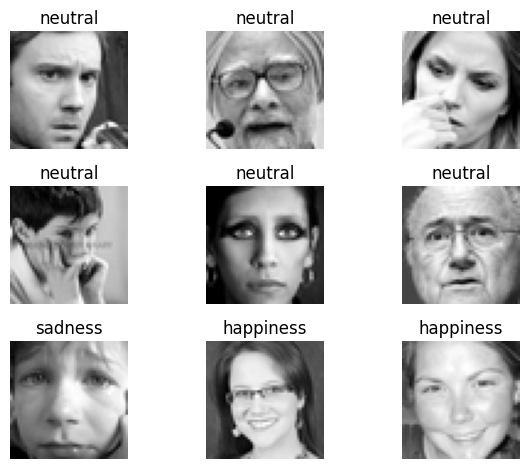

In [29]:
plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"{class_labels[np.argmax(y_train[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [30]:
inputs = layers.Input(shape=(48, 48, 1))

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(9, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 23, 23, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,409 (400.04 KB)

 Trainable params: 101,961 (398.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [31]:
history = model.fit(x_train, y_train,                  
                    epochs=10,
                    batch_size = 32,
                    validation_data=(x_val , y_val),
                    class_weight={index:weight for index,weight in enumerate(class_weights)}
)

Epoch 1/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 131s 141ms/step - accuracy: 0.3323 - loss: 14.5565 - val_accuracy: 0.2886 - val_loss: 1.9383
Epoch 2/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 120s 135ms/step - accuracy: 0.5172 - loss: 12.3382 - val_accuracy: 0.5346 - val_loss: 1.5785
Epoch 3/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 117s 131ms/step - accuracy: 0.5531 - loss: 11.5119 - val_accuracy: 0.4923 - val_loss: 1.6005
Epoch 4/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 125s 141ms/step - accuracy: 0.6243 - loss: 10.6467 - val_accuracy: 0.5679 - val_loss: 1.4981
Epoch 5/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 125s 141ms/step - accuracy: 0.6401 - loss: 10.2077 - val_accuracy: 0.6033 - val_loss: 1.3743
Epoch 6/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 132s 148ms/step - accuracy: 0.6755 - loss: 9.7903 - val_accuracy: 0.6044 - val_loss: 1.3103
Epoch 7/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 125s 140ms/step - accuracy: 0.6878 - loss: 9.4399 - val_accuracy: 0.5803 - val_loss: 1.3742
Epoch 8/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 139s 137ms/step - accuracy: 0.7

In [33]:
model.save('small_weighted_02dropout.keras')